In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [4]:
DataFrame = pd.read_csv('investments_VC.csv', engine="python")

In [5]:
DataFrame.dropna(axis = 0, how = 'all', inplace = True)

# Data Exploration

In [6]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [7]:
fundingcol = pd.DataFrame({"A": [5]})
fundcol = fundingcol.rename(columns = {"A": "totalfundingusd"})

In [8]:
for column in fundcol:
    print(column)

totalfundingusd


In [9]:
DataFrame["totalfundingusd"] = fundcol["totalfundingusd"]
df = DataFrame

In [10]:
df = df.rename(columns = {" funding_total_usd ":"TotalFundingUSD"})

In [11]:
df = df.rename(columns = {" market ":"market"})

In [12]:
df["market"].unique()

array([' News ', ' Games ', ' Publishing ', ' Electronics ', ' Tourism ',
       ' Software ', ' Advertising ', ' Curated Web ', ' E-Commerce ',
       ' Health and Wellness ', ' Real Estate ', ' Education ',
       ' Search ', ' Marketplaces ', ' Restaurants ', ' Media ',
       ' Hospitality ', ' Health Care Information Technology ',
       ' Analytics ', ' Fashion ', ' Mobile Commerce ', ' Mobility ',
       ' Biotechnology ', ' Social Travel ', ' Enterprise Software ',
       ' Personal Health ', ' Sports ', ' Mobile ', ' Pharmaceuticals ',
       ' SaaS ', nan, ' Manufacturing ', ' Entertainment ', ' Travel ',
       ' Designers ', ' Finance ', ' Lifestyle ', ' Chat ',
       ' File Sharing ', ' Video Chat ', ' Mobile Health ',
       ' Mobile Security ', ' Social Media ', ' Photography ',
       ' Fitness ', ' Sales and Marketing ', ' Predictive Analytics ',
       ' Financial Services ', ' Art ', ' Big Data ',
       ' Blogging Platforms ', ' Hardware + Software ',
       ' Soci

In [13]:
df = df.drop(columns = ["permalink", "name", "homepage_url", "category_list", "country_code", "state_code", "region"], axis = 1)



In [14]:
for column in df:
    print(column)

market
TotalFundingUSD
status
city
funding_rounds
founded_at
founded_month
founded_quarter
founded_year
first_funding_at
last_funding_at
seed
venture
equity_crowdfunding
undisclosed
convertible_note
debt_financing
angel
grant
private_equity
post_ipo_equity
post_ipo_debt
secondary_market
product_crowdfunding
round_A
round_B
round_C
round_D
round_E
round_F
round_G
round_H
totalfundingusd


In [15]:
# df.describe()

In [16]:
# df.head()

In [17]:
df = df.drop(columns = ["founded_at"], axis = 1)

In [18]:
# df.describe()

In [19]:
# df[df.isnull().any(axis=1)]

In [20]:
df.drop(columns=["totalfundingusd"], axis=1)

,market,TotalFundingUSD,status,city,funding_rounds,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,News,"17,50,000",acquired,New York,1.0,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Games,"40,00,000",operating,Los Angeles,2.0,NaN,NaN,NaN,2010-06-04,2010-09-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Publishing,"40,000",operating,Tallinn,1.0,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Electronics,"15,00,000",operating,London,1.0,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tourism,"60,000",operating,Fort Worth,2.0,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Education,"3,20,000",operating,London,1.0,2013-01,2013-Q1,2013.0,2014-03-24,2014-03-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,Enterprise Software,"15,87,301",operating,Beijing,1.0,NaN,NaN,NaN,2012-04-01,2012-04-01,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,Web Development,"97,398",operating,Split,5.0,2012-05,2012-Q2,2012.0,2011-11-01,2014-09-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,Games,"93,00,000",operating,NaN,1.0,NaN,NaN,NaN,2011-11-21,2011-11-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df = df.dropna(axis=1, thresh=3, how="any")

In [22]:
df.shape

(49438, 31)

In [23]:
df = df.drop(columns=["founded_year", "first_funding_at", "last_funding_at"], axis=1)

In [24]:
df = df.drop(columns=["city"], axis =1)

In [25]:
df[df.isnull().any(axis=1)]

,market,TotalFundingUSD,status,funding_rounds,founded_month,founded_quarter,seed,venture,equity_crowdfunding,undisclosed,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
1,Games,"40,00,000",operating,2.0,NaN,NaN,0.0,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Software,"70,00,000",NaN,1.0,2011-10,2011-Q4,0.0,7000000.0,0.0,0.0,...,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Advertising,"49,12,393",closed,1.0,NaN,NaN,0.0,0.0,0.0,4912393.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Games,"41,250",operating,1.0,NaN,NaN,41250.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Software,-,operating,1.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,Manufacturing,"90,00,000",NaN,1.0,NaN,NaN,0.0,9000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49422,Testing,-,operating,1.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49431,E-Commerce,"15,10,500",operating,4.0,NaN,NaN,495000.0,140500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,Enterprise Software,"15,87,301",operating,1.0,NaN,NaN,0.0,1587301.0,0.0,0.0,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.dropna(axis = 0, how = 'all', inplace = True)

In [27]:
df.dropna(axis = 1, how = 'all', inplace = True)

In [28]:
df.shape

(49438, 27)

In [29]:
df[df.isnull().any(axis=1)]

,market,TotalFundingUSD,status,funding_rounds,founded_month,founded_quarter,seed,venture,equity_crowdfunding,undisclosed,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
1,Games,"40,00,000",operating,2.0,NaN,NaN,0.0,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Software,"70,00,000",NaN,1.0,2011-10,2011-Q4,0.0,7000000.0,0.0,0.0,...,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Advertising,"49,12,393",closed,1.0,NaN,NaN,0.0,0.0,0.0,4912393.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Games,"41,250",operating,1.0,NaN,NaN,41250.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Software,-,operating,1.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,Manufacturing,"90,00,000",NaN,1.0,NaN,NaN,0.0,9000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49422,Testing,-,operating,1.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49431,E-Commerce,"15,10,500",operating,4.0,NaN,NaN,495000.0,140500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,Enterprise Software,"15,87,301",operating,1.0,NaN,NaN,0.0,1587301.0,0.0,0.0,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.shape

(49438, 27)

In [31]:
df = df[~df.TotalFundingUSD.str.contains("-")]

In [32]:
df["status"].unique()

df = df.dropna(axis=0, subset=['status'])

In [33]:
target = df["TotalFundingUSD"]
# df = df.drop(columns=["TotalFundingUSD"], axis=1)

In [34]:
print(target)

0           17,50,000 
1           40,00,000 
2              40,000 
3           15,00,000 
4              60,000 
             ...      
49433        3,20,000 
49434       15,87,301 
49435          97,398 
49436       93,00,000 
49437     4,50,00,000 
Name: TotalFundingUSD, Length: 39802, dtype: object


In [35]:
target = target.apply(lambda x: x.replace(',', ''))

target

0          1750000 
1          4000000 
2            40000 
3          1500000 
4            60000 
            ...    
49433       320000 
49434      1587301 
49435        97398 
49436      9300000 
49437     45000000 
Name: TotalFundingUSD, Length: 39802, dtype: object

In [36]:
df["TotalFundingUSD"] = df["TotalFundingUSD"].apply(lambda x: x.replace(',', ''))

In [37]:
target = [float(str(i).replace(",", "")) for i in target]


In [38]:
to_change_columns = df.select_dtypes(['category']).columns

df.loc[:, df.dtypes == 'object'] =\
    df.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

df.info()

df[to_change_columns] = df[to_change_columns].apply(lambda x: x.cat.codes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39802 entries, 0 to 49437
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   market                37587 non-null  category
 1   TotalFundingUSD       39802 non-null  category
 2   status                39802 non-null  category
 3   funding_rounds        39802 non-null  float64 
 4   founded_month         31375 non-null  category
 5   founded_quarter       31375 non-null  category
 6   seed                  39802 non-null  float64 
 7   venture               39802 non-null  float64 
 8   equity_crowdfunding   39802 non-null  float64 
 9   undisclosed           39802 non-null  float64 
 10  convertible_note      39802 non-null  float64 
 11  debt_financing        39802 non-null  float64 
 12  angel                 39802 non-null  float64 
 13  grant                 39802 non-null  float64 
 14  private_equity        39802 non-null  float64 
 15  po

In [39]:
df.head()

,market,TotalFundingUSD,status,funding_rounds,founded_month,founded_quarter,seed,venture,equity_crowdfunding,undisclosed,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,News,1750000,acquired,1.0,2012-06,2012-Q2,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Games,4000000,operating,2.0,NaN,NaN,0.0,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Publishing,40000,operating,1.0,2012-10,2012-Q4,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Electronics,1500000,operating,1.0,2011-04,2011-Q2,1500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tourism,60000,operating,2.0,2014-01,2014-Q1,0.0,0.0,60000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df.columns

Index(['market', 'TotalFundingUSD', 'status', 'funding_rounds',
       'founded_month', 'founded_quarter', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [41]:
df = df.drop(columns=["founded_month"], axis =1)

In [42]:
obj_cols = df[['market', 'status', 'founded_quarter']]

obj_cols_to_dum = ['market',
     'status', 'founded_quarter']

dummies_dropFirst = pd.get_dummies(df[obj_cols_to_dum], drop_first=True) #linear models
dummies_noDrop = pd.get_dummies(df[obj_cols_to_dum], drop_first=False) #all other models

#drop the original categorical columns
# slapp the dummies on
df = df.drop(obj_cols, axis=1)
df_linear = pd.concat([df, dummies_dropFirst], axis=1)
df_other = pd.concat([df, dummies_noDrop], axis=1)

df_linear.head()

,TotalFundingUSD,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,founded_quarter_2012-Q3,founded_quarter_2012-Q4,founded_quarter_2013-Q1,founded_quarter_2013-Q2,founded_quarter_2013-Q3,founded_quarter_2013-Q4,founded_quarter_2014-Q1,founded_quarter_2014-Q2,founded_quarter_2014-Q3,founded_quarter_2014-Q4
0,1750000,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4000000,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,40000,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,1500000,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,60000,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df_other['TotalFundingUSD']

0          1750000 
1          4000000 
2            40000 
3          1500000 
4            60000 
            ...    
49433       320000 
49434      1587301 
49435        97398 
49436      9300000 
49437     45000000 
Name: TotalFundingUSD, Length: 39802, dtype: category
Categories (14292, object): [1, 100, 1000, 10000, ..., 999997, 999999, 9999997, 9999999]

In [44]:
# target_corrs_other = df_other.corr()['TotalFundingUSD']

# quality_cols = []

# #loop and check corrs
# for x in range(len(target_corrs_other)):
#     if (abs(target_corrs_other[x]) > 0.25):
#         print(target_corrs_other.index[x], target_corrs_other[x])
#         quality_cols.append(target_corrs_other.index[x]) 

In [46]:
# df = df.fillna(0)
        

In [52]:
#k-means - cluster 
#states, vc firms - round, money per round 
#list comp - tuple
# dictionary w/ tier - state for correct order 

# from sklearn.cluster import KMeans
# X = np.array()
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# >>> kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
# >>> kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])

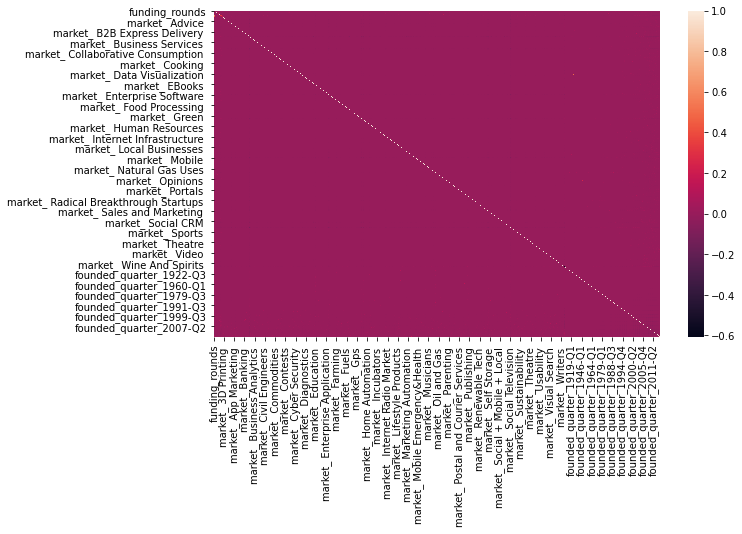

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df_linear.corr())
plt.show()

# Machine Learning

In [54]:
# get pandas columns for prediction
# target = df["TotalFundingUSD"]
features = df

In [55]:
# target = target.apply(lambda x: x[:-4])

In [56]:
# for i, row in target.iterrows():
#     print(row)
#     ifor_val = row
#     df.set_value(i,'ifor',ifor_val)


In [57]:
# x = "17.50,00"
# y= float(x)

In [58]:
# print(target.shape)
# print(target.head())

# print(float(target[0]))

In [59]:
print(features.shape)

(39802, 23)


In [60]:
# features = features.drop(columns=["TotalFundingUSD"],axis=1)

In [61]:
features.shape

(39802, 23)

In [62]:
# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [63]:
X_train.shape

(31841, 23)

Linear Regression
In-Sample R2:  1.0
Out-Sample R2:  1.0

In-Sample MSE:  1.248853138479561e-12
Out-Sample MSE:  1.1419931148354108e-13

In-Sample MAE:  9.495030204227311e-08
Out-Sample MAE:  9.082489828272699e-08


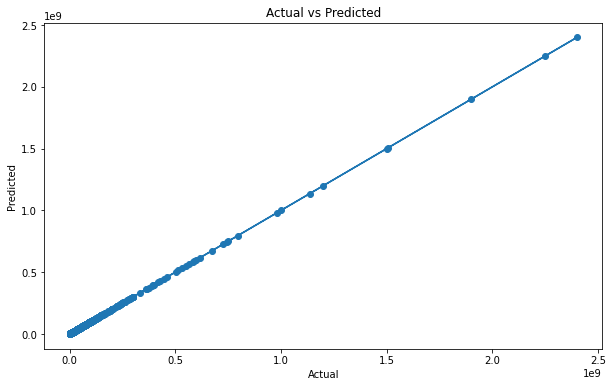

In [64]:
# train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

#metric report
print("Linear Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [65]:
print(in_sample_preds)

[12000002.00000005 63613999.99999975 25000000.00000002 ...
 33358206.99999984  2200000.00000005  6000000.00000007]


In [66]:
y_predicted=reg.predict(X_test)
scores = reg.score(X_test, y_test)

In [67]:
print(scores)

1.0


In [68]:
filename = 'kaggledatamodel.sav'
pickle.dump(reg, open(filename, 'wb'))

Ridge Regression
In-Sample R2:  1.0
Out-Sample R2:  1.0

In-Sample MSE:  4.406765141761952e-12
Out-Sample MSE:  3.805441675181087e-13

In-Sample MAE:  1.2371970570020012e-07
Out-Sample MAE:  1.151497860139568e-07


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11307e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


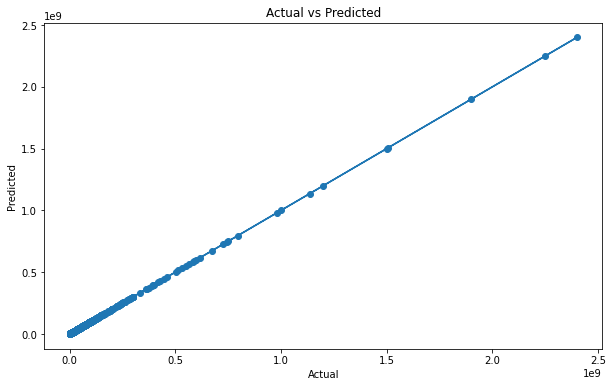

In [69]:
# train the model
ridge = Ridge()
ridge.fit(X_train, y_train)

#get predictions
in_sample_preds = ridge.predict(X_train)
out_sample_preds = ridge.predict(X_test)

#metric report
print("Ridge Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

Lasso Regression
In-Sample R2:  1.0
Out-Sample R2:  1.0

In-Sample MSE:  2.5926552500465573e-15
Out-Sample MSE:  1.7874146294396795e-15

In-Sample MAE:  1.4327983455138079e-08
Out-Sample MAE:  1.4228738990178253e-08


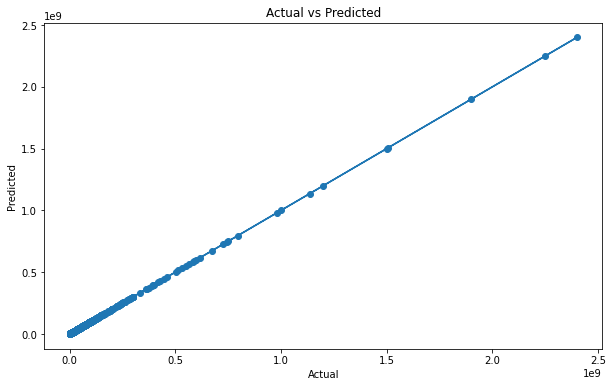

In [70]:
lasso = Lasso()
lasso.fit(X_train, y_train)

#get predictions
in_sample_preds = lasso.predict(X_train)
out_sample_preds = lasso.predict(X_test)

#metric report
print("Lasso Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

ElasticNet Regression
In-Sample R2:  1.0
Out-Sample R2:  1.0

In-Sample MSE:  8.107975456757713e-16
Out-Sample MSE:  8.030122133291166e-16

In-Sample MAE:  6.137723171012146e-09
Out-Sample MAE:  6.297656353891318e-09


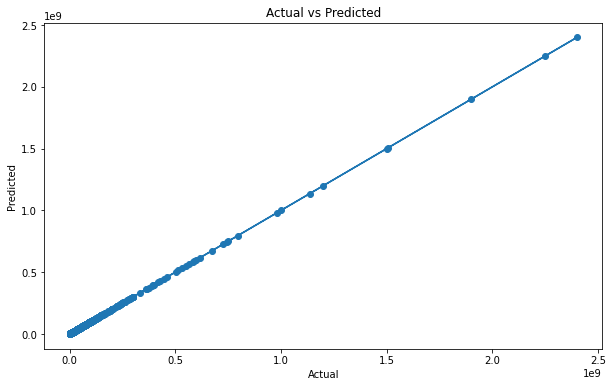

In [71]:
# train the model
en = ElasticNet()
en.fit(X_train, y_train)

#get predictions
in_sample_preds = en.predict(X_train)
out_sample_preds = en.predict(X_test)

#metric report
print("ElasticNet Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [72]:
# get pandas columns for prediction
target = df_other["TotalFundingUSD"]
features = df_other.drop("TotalFundingUSD", axis=1)

X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest
In-Sample R2:  0.9045581984129988
Out-Sample R2:  0.9521707128819452

In-Sample MSE:  3371149644491031.5
Out-Sample MSE:  222707541256272.72

In-Sample MAE:  943076.3547120262
Out-Sample MAE:  1022042.6621057414


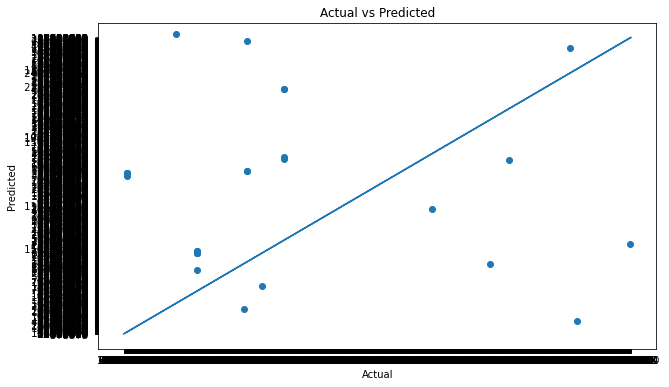

In [73]:

# train the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

#metric report
print("Random Forest")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()